# 作業
### 用 digits (dataset.load_digits()) 資料嘗試跑 t-SNE

In [1]:
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target

In [2]:
#用pca的方式投影
from sklearn import manifold

n_samples, n_features = X.shape
n_neighbors = 30
#n_components:欲降成幾維, 一維填1, 二維填2, 三維填3, 沒有其他選擇.
#perplexity:資料量越大, 值就越大. 預設30, 建議值為5-50, 但可不採納建議自行設定.
#n_iter:要迭代的次數, 預設是1000.
#init:最初投影, 兩個選擇“random”或是“pca”.
#verbose:要不要看訓練過程, verbose=1為打開, 會看到執行的階段與執行程度.
#random_state:控制隨機數的生成.
#method：不用改, 除非數據量很小, 才改成“exact".
tsne = manifold.TSNE(n_components=2, random_state=0, init='pca', learning_rate=200., early_exaggeration=12.)

Computing t-SNE embedding


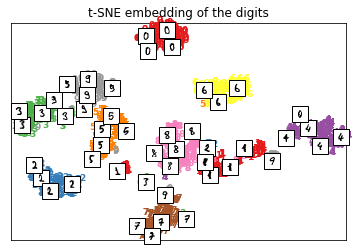

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox

#縮放和可視化嵌入向量
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails(縮圖) with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(X.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
                X[i])
            ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

# t-SNE embedding of the digits dataset
print("Computing t-SNE embedding")

X_tsne = tsne.fit_transform(X)

plot_embedding(X_tsne,
               "t-SNE embedding of the digits")

plt.show()

In [4]:
#用random的方式投影
n_samples, n_features = X.shape
n_neighbors = 30
tsne_random = manifold.TSNE(n_components=2, random_state=0, init='random', learning_rate=200., early_exaggeration=12.)

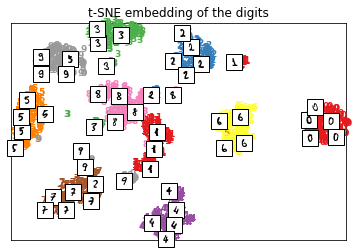

In [5]:
X_tsne = tsne_random.fit_transform(X)

plot_embedding(X_tsne,
               "t-SNE embedding of the digits")

plt.show()